## Overview
**The attributes of good tokens**
- Should be stores in an iterable data structure
-- allows analysis of the 'semantic unit'
- should be all the same case
-- reducees the complexity of our data
- should be free of non-alphanumeric characters (ie punctuation, whitespace)
-- removes information that is probably not relevant to the analysis


In [4]:
random_seq = 'AABAAFBBBBCGCDDEEEFCFFDFFAFFZFGGGGHEAFJAAZBBFCZ'

In [5]:
tokens = list(random_seq)
print(tokens)

['A', 'A', 'B', 'A', 'A', 'F', 'B', 'B', 'B', 'B', 'C', 'G', 'C', 'D', 'D', 'E', 'E', 'E', 'F', 'C', 'F', 'F', 'D', 'F', 'F', 'A', 'F', 'F', 'Z', 'F', 'G', 'G', 'G', 'G', 'H', 'E', 'A', 'F', 'J', 'A', 'A', 'Z', 'B', 'B', 'F', 'C', 'Z']


/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


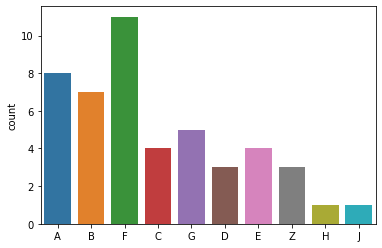

In [8]:
import seaborn as sns
sns.countplot(tokens);

## Tokenizing with Pure Python

In [9]:
sample = 'Friends, Romans, countrymen, lend me your ears;'

In [10]:
sample.split()

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

In [18]:
import pandas as pd

df = pd.read_csv('./data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [19]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [15]:
df['brand'].value_counts()

Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

In [21]:
df['brand'] = df['brand'].apply(lambda x: x.lower())
df['brand'].value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

In [22]:
sample = sample + ' 911'
print(sample)

Friends, Romans, countrymen, lend me your ears; 911


In [23]:
import re
re.sub('[^a-zA-Z 0-9]', '', sample)

'Friends Romans countrymen lend me your ears 911'

In [27]:
def tokenize(text):
    ''' Parses a string into a list of semantic units (words)
    Args:
        test (str): The string that the function will tokenize.
    Returns:
        list: tokens parsed out by the mechanics of your choice.
    '''
    tokens = re.sub('[^a-zA-Z 0-9]', '', text)
    tokens = tokens.lower().split()
    return tokens

In [28]:
tokenize(sample)

['friends', 'romans', 'countrymen', 'lend', 'me', 'your', 'ears', '911']

In [30]:
# imports
from collections import Counter
import re
import pandas as pd
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load('en_core_web_lg')

In [33]:
display(df.head(2))
display(df.shape)

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."


(28332, 24)

In [34]:
df['reviews.text'].value_counts()[:50]

good                60
great               49
Good                42
Great               38
ok                  33
Great price         30
great price         28
Excellent           28
Great value         27
good price          23
great value         22
Great price!        18
good value          17
good deal           16
Great value.        16
Good deal           15
Great product       15
Great deal          15
OK                  15
As expected         15
Good value          14
Good batteries      14
Great batteries.    13
So far so good      13
Good price          13
great deal          13
Great value!        13
Good buy            12
Work great          12
Good value.         11
good batteries      11
Great batteries     11
excellent           11
very good           11
Great deal!         11
Great buy           11
as expected         11
Great price.        11
As described        11
Great!              11
Work great.         10
Nice                10
Perfect!            10
great batte

In [60]:
df['tokens'] = df['reviews.text'].apply(tokenize)
display(df.head())
display(df['tokens'].head())
display(df[['reviews.text', 'tokens']][:10])

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, to, keep, everything, in, its, p..."
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[after, discarding, and, getting, rid, of, bro..."
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[a, few, dollars, more, but, i, am, boycotting..."
8346,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[my, initial, impression, of, this, was, very,..."
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...,"[pros, standard, echo, cons, older, generation..."


8343    [great, case, to, keep, everything, in, its, p...
8344    [after, discarding, and, getting, rid, of, bro...
8345    [a, few, dollars, more, but, i, am, boycotting...
8346    [my, initial, impression, of, this, was, very,...
8347    [pros, standard, echo, cons, older, generation...
Name: tokens, dtype: object

,reviews.text,tokens
8343,Great case to keep everything in its place! My...,"[great, case, to, keep, everything, in, its, p..."
8344,After discarding and getting rid of broken cd ...,"[after, discarding, and, getting, rid, of, bro..."
8345,"A few dollars more, but I am boycotting amazon","[a, few, dollars, more, but, i, am, boycotting..."
8346,My initial impression of this was very good. T...,"[my, initial, impression, of, this, was, very,..."
8347,Pros: Standard Echo. Cons: Older generation Ec...,"[pros, standard, echo, cons, older, generation..."
8348,"Pros: Got it for under 50, much impressive sou...","[pros, got, it, for, under, 50, much, impressi..."
8349,Pros: I love the Alexa series so when this one...,"[pros, i, love, the, alexa, series, so, when, ..."
8350,"ASIDE FROM THE FACT THAT THE SCREEN IS SMALL, ...","[aside, from, the, fact, that, the, screen, is..."
8351,"I wasn't sure I even wanted this item, but cau...","[i, wasnt, sure, i, even, wanted, this, item, ..."
8352,Pros: Works good like Alexia Cons: setting it ...,"[pros, works, good, like, alexia, cons, settin..."


In [61]:
display(df['primaryCategories'].value_counts())
df = df[df['primaryCategories'] == 'Electronics'].copy()

Electronics    13995
Name: primaryCategories, dtype: int64

In [62]:
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs,tokens
8343,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,Great case to keep everything in its place! My...,Excellent product,qs341_5,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[great, case, to, keep, everything, in, its, p..."
8344,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,http://www.amazon.co.uk/gp/product-reviews/B00...,After discarding and getting rid of broken cd ...,It was a much needed storage,Diablita,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[after, discarding, and, getting, rid, of, bro..."
8345,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,5,https://www.ebay.com/itm/Amazonbasics-Nylon-Cd...,"A few dollars more, but I am boycotting amazon",it was worth it,coldbloodblazing,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[a, few, dollars, more, but, i, am, boycotting..."
8346,AVpe7nGV1cnluZ0-aG2o,2014-10-28T11:14:38Z,2019-04-25T09:05:28Z,AmazonBasics Nylon CD/DVD Binder (400 Capacity),"B00DIHVMEA,B00EZ1ZTV0",amazonbasics,"Audio & Video Accessories,TV, Video & Home Aud...",Electronics,http://ecx.images-amazon.com/images/I/41jQha7Z...,amazonbasicsnyloncddvdbinder400capacity/b00ez1...,...,NaN,NaN,NaN,2,http://www.amazon.co.uk/gp/product-reviews/B00...,My initial impression of this was very good. T...,"Not well designed, very tight when full. Becom...",Snrub,https://www.ebay.com/itm/AmazonBasics-Nylon-CD...,"[my, initial, impression, of, this, was, very,..."
8347,AVpfl8cLLJeJML43AE3S,2016-04-08T18:16:28Z,2019-04-25T08:51:22Z,Amazon Echo ‚Äì White,"B01E6AO69U,B00L9EPT8O",amazon,"Stereos,Remote Controls,Audio Docks & Mini Spe...",Electronics,https://i.ebayimg.com/images/g/NWEAAOSwDehbdx6...,"amazonechowhite/b00l9ept8o,amazonechowhite/b01...",...,NaN,NaN,NaN,5,https://www.newegg.com/Product/Product.aspx?It...,Pros: Standard Echo. Cons: Older generation Ec...,Arrived as described.,Anonymous,https://www.newegg.com/Product/Product.aspx?It...,"[pros, standard, echo, cons, older, generation..."


In [63]:
# the 'Counter' object takes an iterable, but you can instantiate an empty one and update it
word_counts = Counter()
# update based on a split of each of our docs
df['tokens'].apply(lambda x: word_counts.update(x))
# print out 10 most common words
word_counts.most_common(10)

[('the', 17723),
 ('and', 14005),
 ('it', 13113),
 ('to', 12750),
 ('for', 12224),
 ('i', 12037),
 ('a', 10494),
 ('is', 8508),
 ('this', 8109),
 ('my', 7914)]

In [64]:
# create a func which takes a corpus of document and returns a df of word counts for us to analyze
def count(docs):
    word_counts = Counter()
    appears_in = Counter()
    
    total_docs = len(docs)
    
    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))
        
    temp = zip(word_counts.keys(), word_counts.values())
    
    wc = pd.DataFrame(temp, columns = ['word', 'count'])
    
    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()
    
    wc['pct_total'] = wc['count'].apply(lambda x: x / total)
    
    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()
    
    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')
    
    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
    
    return wc.sort_values(by='rank')

In [65]:
wc = count(df['tokens'])
display(wc.head())

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
59,the,7809,17723,1.0,0.041211,0.041211,0.557985
34,and,8543,14005,2.0,0.032565,0.073776,0.610432
2,it,7490,13113,3.0,0.030491,0.104267,0.535191
13,to,7137,12750,4.0,0.029647,0.133914,0.509968
72,for,7990,12224,5.0,0.028424,0.162339,0.570918


<AxesSubplot:xlabel='rank', ylabel='cul_pct_total'>

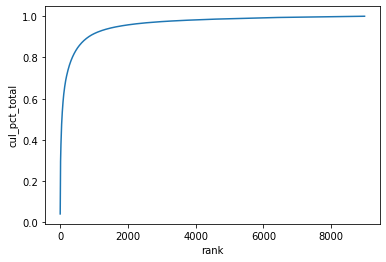

In [66]:
# cumulative distribution plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

0.6130405666212466

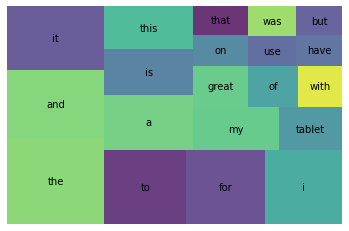

In [67]:
display(wc[wc['rank'] <= 100]['cul_pct_total'].max())

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [71]:
nlp = spacy.load('en_core_web_lg')

tokenizer = Tokenizer(nlp.vocab)


In [76]:
tokens = []
''' make them tokens '''
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [77]:
df['tokens'].head()

8343    [Great, case, to, keep, everything, in, its, p...
8344    [After, discarding, and, getting, rid, of, bro...
8345    [A, few, dollars, more,, but, I, am, boycottin...
8346    [My, initial, impression, of, this, was, very,...
8347    [Pros:, Standard, Echo., Cons:, Older, generat...
Name: tokens, dtype: object

In [78]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
66,the,7230,15157,1.0,0.035131,0.035131,0.516613
36,and,8438,13734,2.0,0.031832,0.066963,0.602930
14,to,7090,12621,3.0,0.029253,0.096216,0.506610
80,for,7811,11753,4.0,0.027241,0.123457,0.558128
107,I,5846,11554,5.0,0.026780,0.150237,0.417721


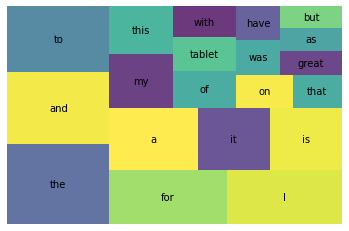

In [79]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [80]:
# nlp.Defaults.stop_words
# from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# ENGLISH_STOP_WORDS

In [82]:
tokens = []
''' update those tokens w/o stopwrods'''
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [83]:
df.tokens.head()

8343    [great, case, place!, husband, love, it!!!!, h...
8344    [discarding, getting, rid, broken, cd, cases,,...
8345                 [dollars, more,, boycotting, amazon]
8346    [initial, impression, good., material, nicer, ...
8347    [pros:, standard, echo., cons:, older, generat...
Name: tokens, dtype: object

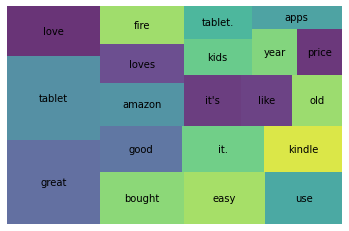

In [84]:
wc = count(df['tokens'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [85]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [87]:
STOP_WORDS = nlp.Defaults.stop_words.union(['batteries', 'I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this'])
# STOP_WORDS

In [88]:
tokens = []
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    doc_tokens = []
    for token in doc:
        if token.text.lower() not in STOP_WORDS:
            doc_tokens.append(token.text.lower())
    tokens.append(doc_tokens)
df['tokens'] = tokens

In [89]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,great,3620,4181,1.0,0.020612,0.020612,0.258664
1515,tablet,3463,4176,2.0,0.020588,0.041200,0.247446
1,love,2234,2465,3.0,0.012152,0.053352,0.159628
1234,bought,2194,2327,4.0,0.011472,0.064824,0.156770
138,easy,2107,2275,5.0,0.011216,0.076040,0.150554


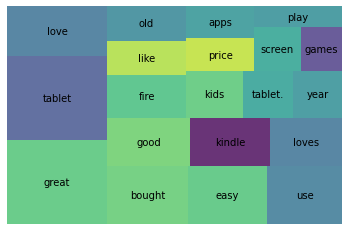

In [90]:
wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [91]:
df['reviews.rating'].value_counts()

5    9371
4    3703
3     551
1     187
2     183
Name: reviews.rating, dtype: int64

<AxesSubplot:xlabel='rank', ylabel='cul_pct_total'>

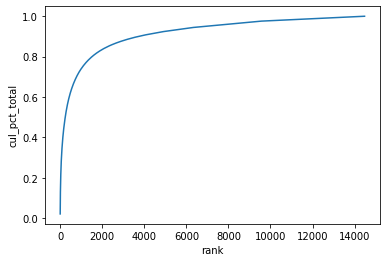

In [92]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

In [94]:
wc.tail(20)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
14454,say..............................................,1,1,14454.0,0.000005,0.999906,0.000071
14453,kindlelishous!!!!!!!!!!!!!,1,1,14455.0,0.000005,0.999911,0.000071
14455,"competent,",1,1,14456.0,0.000005,0.999916,0.000071
14456,"3-year-old,",1,1,14457.0,0.000005,0.999921,0.000071
14457,objective,1,1,14458.0,0.000005,0.999926,0.000071
14459,dollars.my,1,1,14459.0,0.000005,0.999931,0.000071
14460,relies,1,1,14460.0,0.000005,0.999936,0.000071
14458,gps.,1,1,14461.0,0.000005,0.999941,0.000071
14461,"readi,g",1,1,14462.0,0.000005,0.999946,0.000071
14467,perfectly..great,1,1,14463.0,0.000005,0.999951,0.000071


count    14473.000000
mean         0.000945
std          0.005579
min          0.000071
25%          0.000071
50%          0.000143
75%          0.000357
max          0.258664
Name: appears_in_pct, dtype: float64

/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


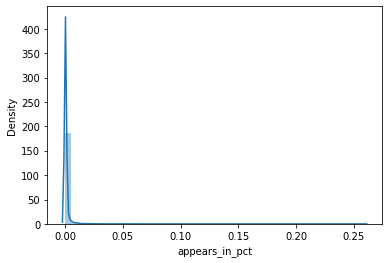

In [98]:
display(wc['appears_in_pct'].describe())
sns.distplot(wc['appears_in_pct']);

(67, 7)

/Users/jeffkang/.local/share/virtualenvs/DS-Unit-4-Sprint-1-NLP-oR_Dfgyc/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


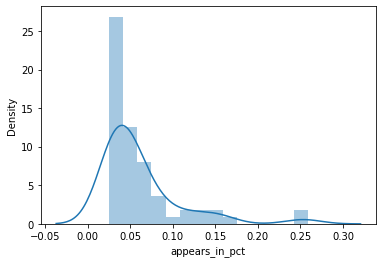

In [103]:
wc = wc[wc['appears_in_pct'] >= 0.025]
display(wc.shape)
sns.distplot(wc['appears_in_pct']);

In [104]:
ps = PorterStemmer()

words = ['wolf', 'wolves']

for word in words:
    print(ps.stem(word))

wolf
wolv


In [105]:
# put in new col 'stems'
df['stems'] = df['tokens'].apply(lambda x: [ps.stem(token) for token in x])
df['stems']

8343     [great, case, place!, husband, love, it!!!!, h...
8344     [discard, get, rid, broken, cd, cases,, broken...
8345                               [dollar, more,, boycot]
8346     [initi, impress, good., materi, nicer, shini, ...
8347     [pros:, standard, echo., cons:, older, gener, ...
                               ...                        
28327    [got, 2, 8, yr, old, twins., 11, yr, old, bett...
28328    [bought, niec, christma, gift.sh, 9, year, old...
28329    [nice, light, internet, browsing,, keep, email...
28330    [tablet, absolut, want!, watch, tv, show, movi...
28331    [nineti, dollars,, expection, low,, good, tabl...
Name: stems, Length: 13995, dtype: object

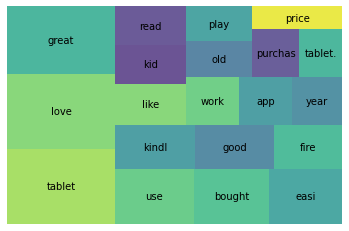

In [106]:
wc = count(df['stems'])
wc_top20 = wc[wc['rank'] <= 20]
squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()

In [107]:
# lemmatization
sent = 'This is the start of our NLP adventures. We started here with Spacy. We are starting here with NLP.'
nlp = spacy.load('en_core_web_lg')
doc = nlp(sent)
for token in doc:
    print(token.text, ' ', token.lemma_)

This   this
is   be
the   the
start   start
of   of
our   our
NLP   NLP
adventures   adventure
.   .
We   we
started   start
here   here
with   with
Spacy   Spacy
.   .
We   we
are   be
starting   start
here   here
with   with
NLP   NLP
.   .


In [112]:
# wrap it all in a func
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
        if ((token.is_stop == False) and (token.is_punct == False) and (token.pos_ != 'PRON')):
            lemmas.append(token.lemma_)
    return lemmas

In [115]:
from tqdm import tqdm
tqdm.pandas()

In [116]:
df['lemmas'] = df['reviews.text'].progress_apply(get_lemmas)

100%|███████████████████████████████████████████████████████████████| 13995/13995 [01:34<00:00, 148.85it/s]


In [117]:
df['lemmas'].head()

8343    [great, case, place, husband, love, hold, lot,...
8344    [discard, get, rid, broken, cd, case, broken, ...
8345                            [dollar, boycott, amazon]
8346    [initial, impression, good, material, nice, sh...
8347    [pro, Standard, Echo, con, old, generation, Ec...
Name: lemmas, dtype: object

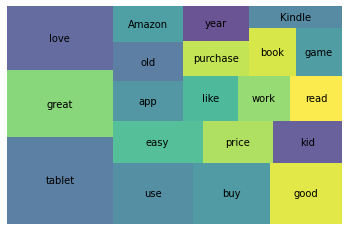

In [118]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=0.8)
plt.axis('off')
plt.show()